In [22]:
# reading in the data
import pandas as pd
import numpy as np
import matplotlib

data_offers = pd.read_csv("../data/data_offers.csv")
data_orders = pd.read_csv("../data/data_orders.csv")

In [10]:
df = data_orders.merge(right = data_offers, how = "inner", on = "order_gk")  # merging the tables on ordergk (order number)

In [11]:
# assigning each key a value
df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"] == 1, "Yes", "No") 
df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject")
df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [12]:
# an easy way to visualize the combinations of outcomes for these two columns
df.groupby(["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

<Axes: >

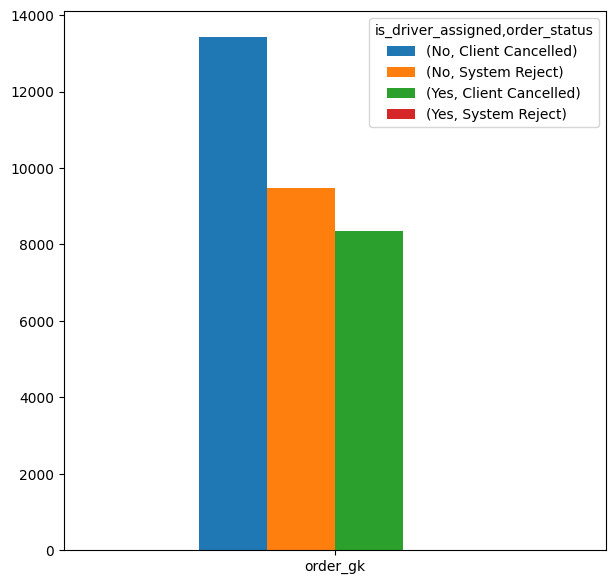

In [13]:
# a plot of these outcomes
df_piv = df.pivot_table(columns = ["is_driver_assigned", "order_status"], values = "order_gk", aggfunc = "count")
df_piv.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

Here, we can see that there are a large number of clients who cancelled when there was no driver assigned, likely due to waiting too long or finding another mode of transportation. Next, for the riders who have not been assigned a ride and got system rejected, it simply shows how many riders have been system rejected, as this system rejection means they should not be getting a ride in the first place. For the drivers who have been assigned but cancelled, this could also indicate clients waiting too long. Lastly, for those who have been assigned a driver and got system cancelled, this is likely due to a system error where the app may have accidentally assigned a driver to a non-eligible person. 

In [14]:
df["order_hours"] = pd.to_datetime(
    df["order_datetime"],
    format="%H:%M:%S"
).dt.hour

<Axes: title={'center': 'Count of Failed Orders by Hour of Day'}, xlabel='order_hours'>

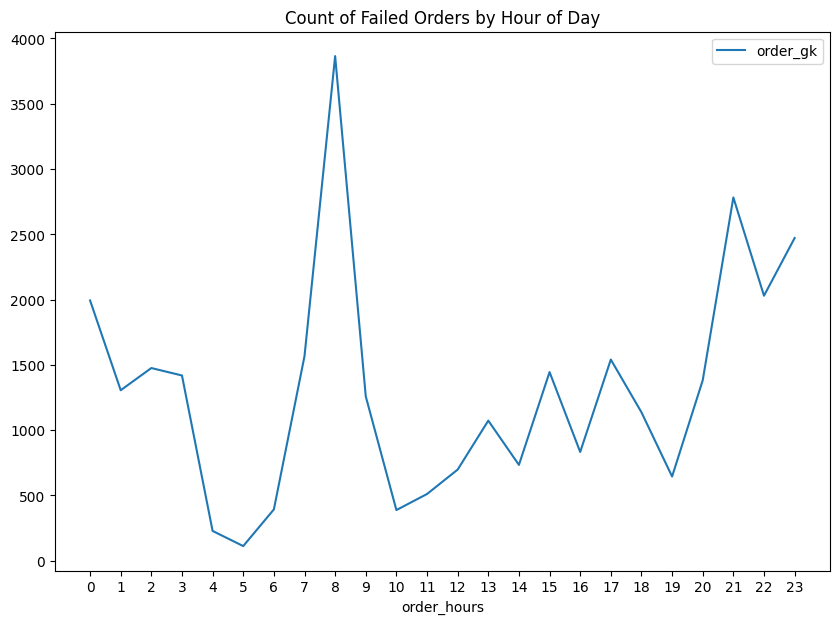

In [17]:
df.groupby(by = "order_hours")["order_gk"].count().plot(figsize=(10, 7),
                                                         legend=True,
                                                         xticks=range(0, 24),
                                                         title="Count of Failed Orders by Hour of Day")

In [19]:
grouped_hour = df.groupby(["order_hours", "is_driver_assigned", "order_status"])["order_gk"].count()
grouped_hour

order_hours  is_driver_assigned  order_status    
0            No                  Client Cancelled     957
                                 System Reject        706
             Yes                 Client Cancelled     326
                                 System Reject          4
1            No                  Client Cancelled     633
                                                     ... 
22           No                  System Reject        660
             Yes                 Client Cancelled     415
23           No                  Client Cancelled    1144
                                 System Reject        883
             Yes                 Client Cancelled     444
Name: order_gk, Length: 73, dtype: int64

<Axes: title={'center': 'Count of Failed Orders Per Hour and Category'}, xlabel='order_hours'>

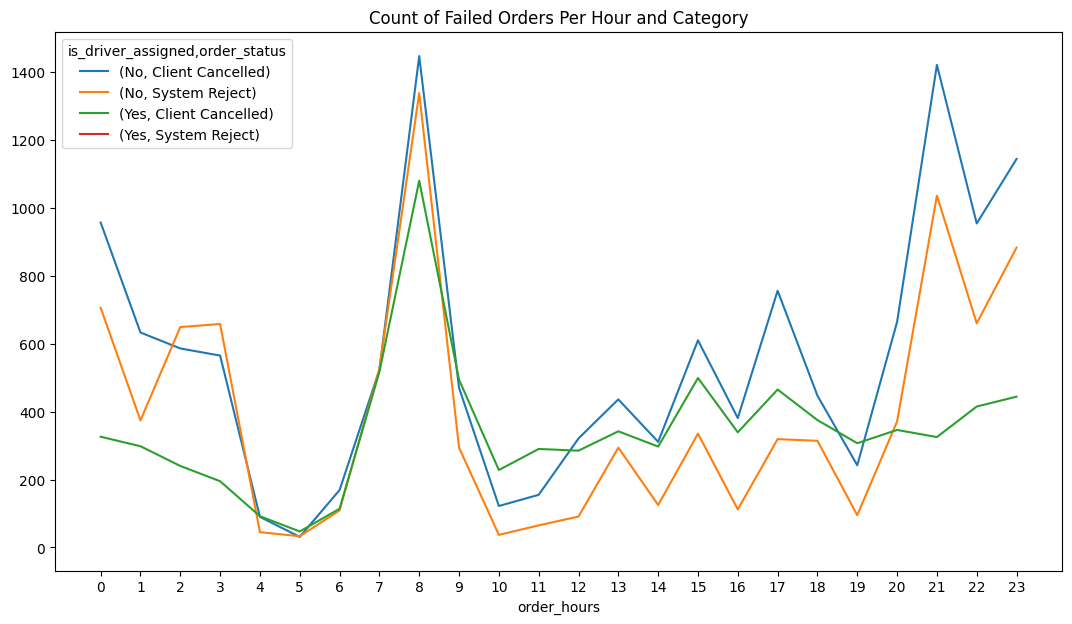

In [21]:
grouped_hour.reset_index().pivot(index="order_hours",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category")

